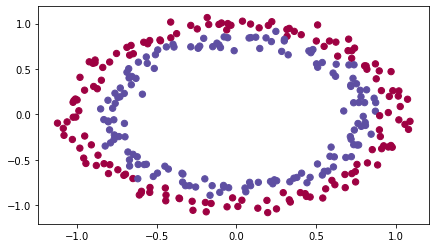

In [1]:
import os
import sys
sys.path.append( os.path.abspath("../../workspace/python-work/python 3/cs230_deeplearning_implement/ec_code/")  )
from class2.week1.assignment1.init_utils import *
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

'''
1. 初始化参数：
    1.1：使用随机数来初始化参数。
    1.2：使用抑梯度异常初始化参数（参见视频中的梯度消失和梯度爆炸）。
2. 正则化模型：
    2.1：使用二范数对二分类模型正则化，尝试避免过拟合。
    2.2：使用随机删除节点的方法精简模型，同样是为了尝试避免过拟合。
3. 梯度校验  ：对模型使用梯度校验，检测它是否在梯度下降的过程中出现误差过大的情况。
'''
# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

In [2]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    else : 
        print("wrong intitialize parameters,exit")
        exit

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration {}: {}".format(i, cost))
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters



# GRADED FUNCTION: initialize_parameters_random
def initialize_parameters_random(layers_dims):
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) *10 #使用10倍缩放
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))
    return parameters


# GRADED FUNCTION: initialize_parameters_he
#抑梯度异常初始化
#   np.sqrt(2/深一层的维度)   来初始化参数。
#   parameters['W' + str(l)] = np.random.randn (layers_dims[l], layers_dims[l - 1])       * np.sqrt(2 / layers_dims[l - 1])
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1])       * np.sqrt(2 / layers_dims[l - 1])
        # print(layers_dims[l], layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

        
    return parameters

C:\workspace\python-work\python 3\cs230_deeplearning_implement\ec_code\class2\week1\assignment1\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\workspace\python-work\python 3\cs230_deeplearning_implement\ec_code\class2\week1\assignment1\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf


Cost after iteration 1000: 0.6250982793959966


Cost after iteration 2000: 0.5981216596703697


Cost after iteration 3000: 0.5638417572298645


Cost after iteration 4000: 0.5501703049199763


Cost after iteration 5000: 0.5444632909664456


Cost after iteration 6000: 0.5374513807000807


Cost after iteration 7000: 0.4764042074074983


Cost after iteration 8000: 0.39781492295092263


Cost after iteration 9000: 0.3934764028765484


Cost after iteration 10000: 0.3920295461882659


Cost after iteration 11000: 0.38924598135108


Cost after iteration 12000: 0.3861547485712325


Cost after iteration 13000: 0.384984728909703


Cost after iteration 14000: 0.3827828308349524


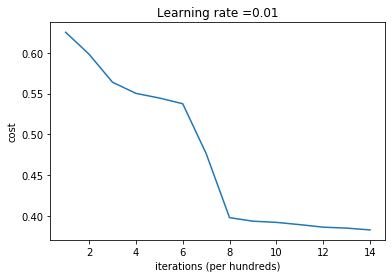

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


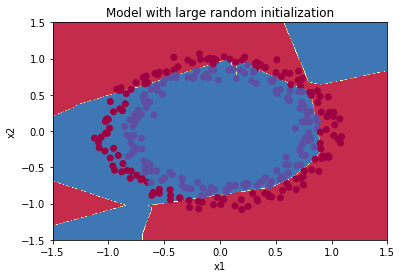

In [3]:

#随机初始化，可以看到误差开始很高。这是因为由于具有较大的随机权重，
# 最后一个激活(sigmoid)输出的结果非常接近于0或1，而当它出现错误时，它会导致非常高的损失。
# 初始化参数如果没有很好地话会导致梯度消失、爆炸，这也会减慢优化算法。====》正则
 
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


print (predictions_train)
print (predictions_test)

plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

10 2
5 10
1 5
Cost after iteration 0: 0.8830537463419761


Cost after iteration 1000: 0.6879825919728063


Cost after iteration 2000: 0.6751286264523371


Cost after iteration 3000: 0.6526117768893807


Cost after iteration 4000: 0.6082958970572937


Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793


Cost after iteration 7000: 0.3117803464844441


Cost after iteration 8000: 0.23696215330322556


Cost after iteration 9000: 0.18597287209206828


Cost after iteration 10000: 0.15015556280371808


Cost after iteration 11000: 0.12325079292273548


Cost after iteration 12000: 0.09917746546525937


Cost after iteration 13000: 0.08457055954024274


Cost after iteration 14000: 0.07357895962677366


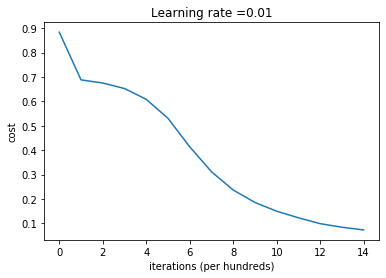

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


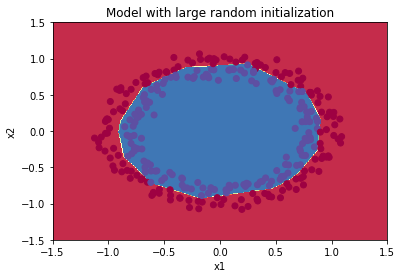

In [4]:
#抑梯度异常初始化
#   np.sqrt(2/深一层的维度)   来初始化参数。
#   parameters['W' + str(l)] = np.random.randn (layers_dims[l], layers_dims[l - 1])       * np.sqrt(2 / layers_dims[l - 1])

parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
